In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import re


from plotnine import ggplot, aes, geoms, scales, position_dodge,ylab,xlab
from plotnine import theme, element_blank,element_line,element_rect,element_text, ylim, xlim, annotate, ggtitle,coord_flip

In [2]:
results = pd.read_csv('Results/Lasso.csv')

with open('Results/Official_TopicModel_80k.pkl', 'rb') as File:
    Models = joblib.load(File)
    
mapper = Models['mapper']
mapper['year'] = pd.to_numeric(mapper['year'])

## speech models

In [3]:
year = 1995
coefs = results.loc[results.year == year]

In [4]:
def make_plot(year,type='speaker_accuracy'):
    
    # get the classification results row
    coefs = results.loc[results.year == year]
    
    # coefficients for model
    coefs = coefs['coefs'].values[0]

    # string format coeficients into numpy array
    coefs = np.fromstring(coefs.strip('[]'), dtype=float, sep=' ')

    # prepare coeficient DF for plotting
    coef_df = pd.DataFrame({"coefs":coefs,"topic_id":range(len(coefs)),'year':year}).sort_values('coefs',ascending=False)
    coef_df = coef_df.merge(mapper,on=['year','topic_id'],how='left')
    
    # assign party based on > 0
    coef_df['party'] = coef_df.coefs.apply(lambda x: 'Dem' if x > 0 else 'Rep')
    coef_df['inverse_coef'] = 0-coef_df['coefs'] # flip coef for left-right

    # assign duplicate label names
    new_labels = []
    tracker = []
    for coef in coef_df['dynamic_label']:
        if coef not in tracker:
            new_labels.append(coef)
        else:
            new_labels.append(f"{coef}_{len([i for i in tracker if i == coef]) + 1}")
        tracker.append(coef)

    coef_df['new_labels'] = new_labels
    coef_df['new_labels'] = pd.Categorical(coef_df['new_labels'], categories=new_labels)

    
    # plot
    return (
        ggplot(coef_df.loc[((coef_df.coefs > 1) | (coef_df.coefs < -1)) & (-coef_df.dynamic_label.isin(['NA','procedural']))],
               aes(x = 'new_labels',y='inverse_coef',color='party')) + 
        geoms.geom_point(size=2) + 
        geoms.geom_segment( aes(x='new_labels', xend='new_labels', y=0, yend='inverse_coef'),color='grey') + 
        coord_flip() + 
        scales.scale_color_manual(values=['blue','red'],guide=False) + 
        theme(panel_background=element_blank()) + 
        xlab('Agenda Topic') + 
        ylab('coefficient') + 
        ggtitle(str(year))
    )

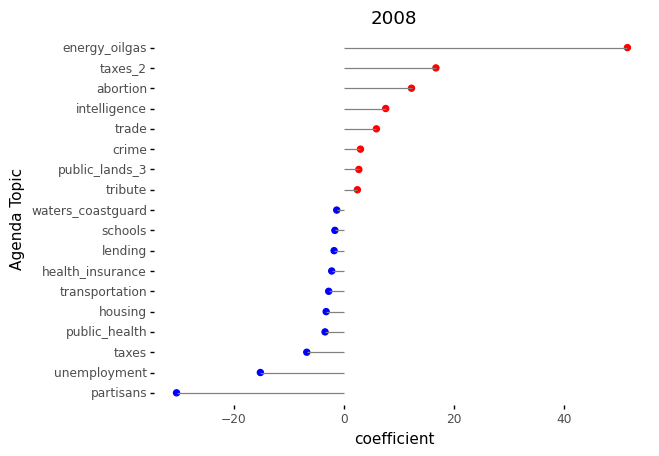

<ggplot: (8772159856936)>

In [11]:
make_plot(2008,'speech_accuracy')
# x.save(filename='Results/Figures/2011_coefs.png',dpi=300)

In [63]:
x.save(filename='Results/Figures/2011_coefs.png',dpi=300)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Results/Figures/2011_coefs.png


In [67]:
x

AttributeError: 'int' object has no attribute 'split'